## The result of bug fix in the low resoution toy model

#### umo and vmo are transport and the downsampled value at each coarse cell should be almost twice the value at the original fine cell. This shows how the bug fix makes them so.

In [1]:
import numpy as np
import netCDF4 as nc
import imp  
#import ocean_grid_generator as ogg
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import cmocean
import cmocean.cm as cmo

dataset_p125 = nc.Dataset('/net2/nnz/platforms/mom6/exps/mom6_sis2/19000101.ocean_daily_postfix.nc')
#for var in dataset.variables: print(var,end=' ')
#xh yh z_l z_i time nv xq yq volcello thetao thetao_xyave so so_xyave obvfsq umo vmo time_bnds average_T1 average_T2 average_DT
umo_p125 = dataset_p125.variables['umo']
vmo_p125 = dataset_p125.variables['vmo']
uo_p125 = dataset_p125.variables['uo']
vo_p125 = dataset_p125.variables['vo']
vol_p125 = dataset_p125.variables['volcello']
xh_p125  = dataset_p125.variables['xh']
yh_p125  = dataset_p125.variables['yh']
print(umo_p125.shape,xh_p125.shape,yh_p125.shape)
time = dataset_p125.variables['time'] 
print(nc.num2date(time[0],time.units)) #1960-07-02 00:00:00

dataset_p125_d2= nc.Dataset('/net2/nnz/platforms/mom6/exps/mom6_sis2/19000101.ocean_daily_d2_postfix.nc')
umo_p125_d2 = dataset_p125_d2.variables['umo']
vmo_p125_d2 = dataset_p125_d2.variables['vmo']
uo_p125_d2 = dataset_p125_d2.variables['uo']
vo_p125_d2 = dataset_p125_d2.variables['vo']
vol_p125_d2 = dataset_p125_d2.variables['volcello']
xh_p125_d2 = dataset_p125_d2.variables['xh']
yh_p125_d2 = dataset_p125_d2.variables['yh']
print(umo_p125_d2.shape,xh_p125_d2.shape,yh_p125_d2.shape)
time = dataset_p125.variables['time'] 
print(nc.num2date(time[0],time.units)) #1960-07-02 00:00:00

(2, 75, 144, 180) (180,) (144,)
1900-01-01 12:00:00
(2, 75, 72, 90) (90,) (72,)
1900-01-01 12:00:00


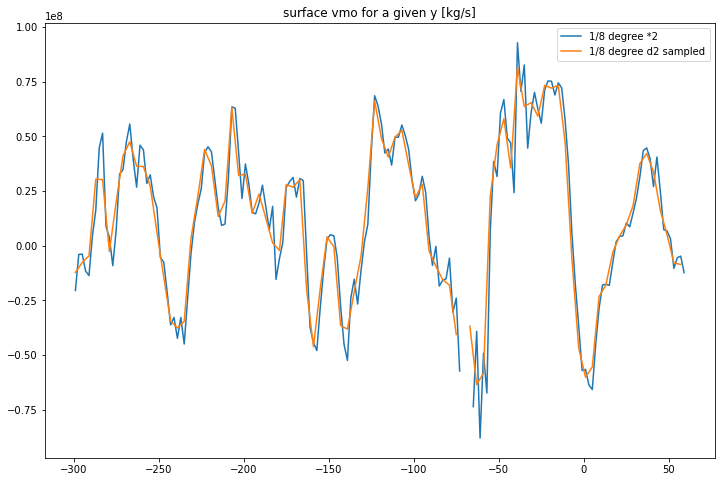

In [2]:
plt.figure(figsize=(12,8))
plt.title('surface vmo for a given y [kg/s]'); 
plt.plot(xh_p125,2*vmo_p125[0,0,40,:],label='1/8 degree *2')
plt.plot(xh_p125_d2,vmo_p125_d2[0,0,20,:],label='1/8 degree d2 sampled')

plt.legend();

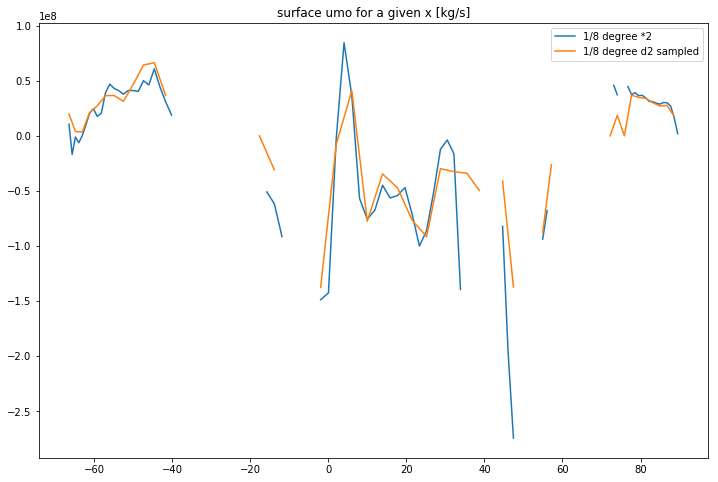

In [3]:
plt.figure(figsize=(12,8))
plt.title('surface umo for a given x [kg/s]'); 
plt.plot(yh_p125,2*vmo_p125[0,0,:,40],label='1/8 degree *2')
plt.plot(yh_p125_d2,vmo_p125_d2[0,0,:,20],label='1/8 degree d2 sampled')

plt.legend();

### Another way to see this is to look at the sum of vmo (or umo) over y (or x). The downsampled sum should equal the original sum because these are transport (Kg/s). 

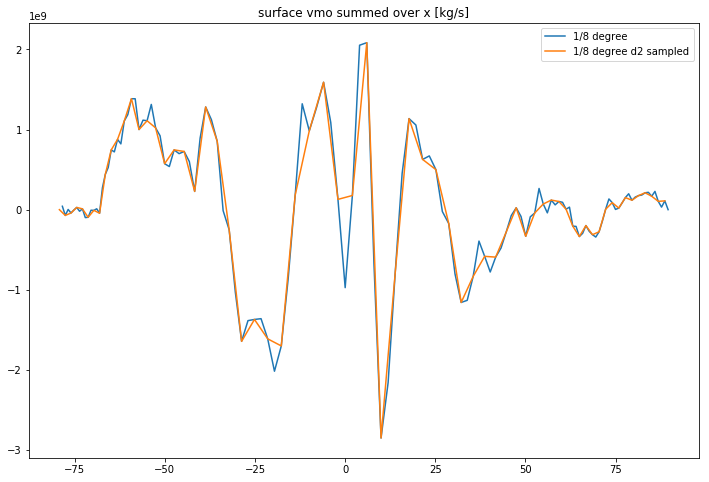

In [4]:
plt.figure(figsize=(12,8))
vmosum_p125 = np.sum(vmo_p125[0,0],axis=1)
vmosum_p125_d2 = np.sum(vmo_p125_d2[0,0],axis=1)

plt.title('surface vmo summed over x [kg/s]'); 
plt.plot(yh_p125,vmosum_p125,label='1/8 degree')
plt.plot(yh_p125_d2,vmosum_p125_d2,label='1/8 degree d2 sampled')

plt.legend();

### SSS quantities (e.g.,  grid cell volume) are supposed to be summed on 4 fine cells when downsampling to a coarser cell, so the downsampled  diagnostics is supposed to be almost 4 times of the original. 

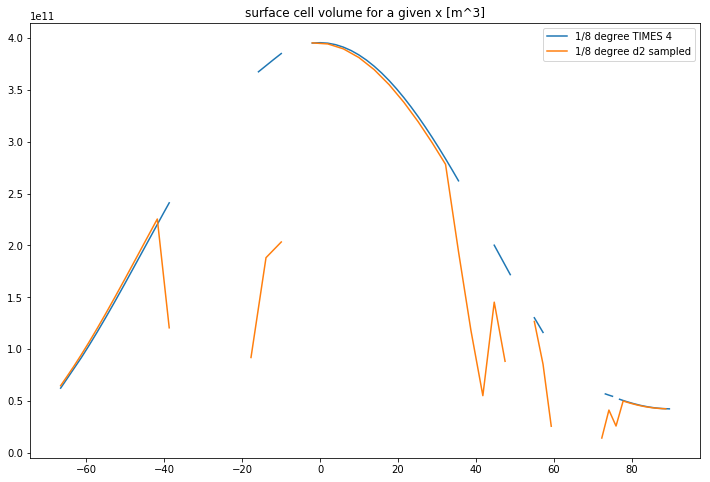

In [6]:
plt.figure(figsize=(12,8))
plt.title('surface cell volume for a given x [m^3]'); 
plt.plot(yh_p125,4*vol_p125[0,0,:,40],label='1/8 degree TIMES 4')
plt.plot(yh_p125_d2,vol_p125_d2[0,0,:,20],label='1/8 degree d2 sampled')
plt.legend();

### Non-transport quantities look fine.

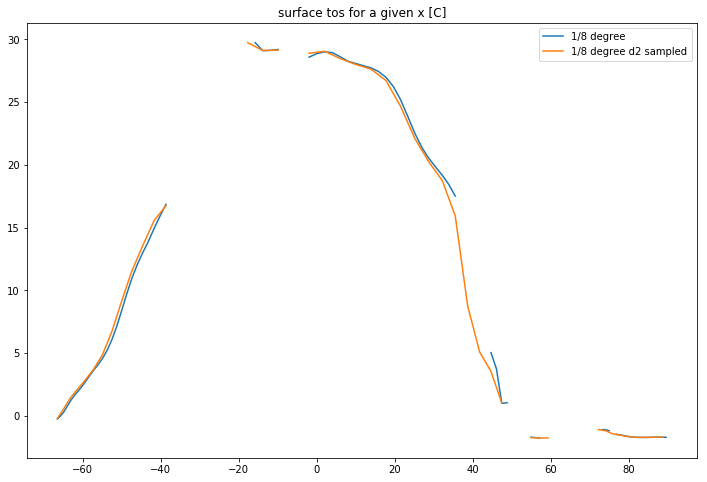

In [5]:
tos_p125 = dataset_p125.variables['tos']
tos_p125_d2 = dataset_p125_d2.variables['tos']

plt.figure(figsize=(12,8))
plt.title('surface tos for a given x [C]'); 
plt.plot(yh_p125,tos_p125[0,:,40],label='1/8 degree')
plt.plot(yh_p125_d2,tos_p125_d2[0,:,20],label='1/8 degree d2 sampled')
plt.legend();